In [1]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.utils.np_utils import to_categorical#convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split  


ModuleNotFoundError: No module named 'cv2'

In [2]:
data=r'/Users/hani/Desktop/capstone/capstone_final_project/Cotton Diesease/datasets/Cotton Disease/train'

In [3]:
Images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    img=os.path.join(dirname,filename)
    Images.append(img)

In [4]:
Images[:10]

['C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (1)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (10)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (101)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (102)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (103)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (104)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (105)_iaip.jpg',
 'C:\\Users\\Hemanth\\Music\\Cotton Diesease\\datasets\\Cotton Disease\\train\\diseased cotton leaf\\dis_leaf (106

In [5]:
len(Images)

1530

In [6]:
class_label=[]
for i in Images:
  j=i.split('\\')
  class_label.append(j[-2])



In [7]:
class_label[:10]

['diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf',
 'diseased cotton leaf']

In [8]:
len(class_label)

1530

In [9]:
#shuffle two lists with same order
temp=list(zip(Images,class_label))
random.shuffle(temp)
Images,class_label=zip(*temp)
data=pd.DataFrame(list(zip(Images,class_label)),columns=['image_path','class_label'])

In [10]:
data.shape

(1530, 2)

In [11]:
data.head()

,image_path,class_label
0,C:\Users\Hemanth\Music\Cotton Diesease\dataset...,diseased cotton plant
1,C:\Users\Hemanth\Music\Cotton Diesease\dataset...,diseased cotton plant
2,C:\Users\Hemanth\Music\Cotton Diesease\dataset...,diseased cotton plant
3,C:\Users\Hemanth\Music\Cotton Diesease\dataset...,diseased cotton plant
4,C:\Users\Hemanth\Music\Cotton Diesease\dataset...,diseased cotton leaf


In [12]:
data.class_label.value_counts()

diseased cotton plant    815
fresh cotton leaf        427
diseased cotton leaf     288
Name: class_label, dtype: int64

In [13]:
from sklearn.utils import resample
df_c0 = data[data['class_label']== 'diseased cotton plant']
df_c1 = data[data['class_label']== 'fresh cotton leaf']
df_c2 = data[data['class_label']== 'diseased cotton leaf']

In [14]:
#downsample the majority class
upsampled_df_c0=resample(df_c0,replace=True,random_state=23,n_samples=1000)
upsampled_df_c1=resample(df_c1,replace=True,random_state=23,n_samples=1000)
upsampled_df_c2=resample(df_c2,replace=True,random_state=23,n_samples=1000)

In [15]:
#Cobine both
df_upsampled=pd.concat([upsampled_df_c0,upsampled_df_c1,upsampled_df_c2])

In [18]:
df_upsampled.head()

,image_path,class_label
1115,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
1391,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
76,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
942,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
58,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant


In [19]:
df_upsampled.tail()

,image_path,class_label
311,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf
313,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf
601,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf
127,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf
1010,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf


In [20]:
df_upsampled.class_label.value_counts()

diseased cotton plant    1000
fresh cotton leaf        1000
diseased cotton leaf     1000
Name: class_label, dtype: int64

shuffle

In [21]:
data=df_upsampled.sample(frac=1)
data.head()

,image_path,class_label
377,/content/drive/MyDrive/train/fresh cotton leaf...,fresh cotton leaf
595,/content/drive/MyDrive/train/fresh cotton leaf...,fresh cotton leaf
1530,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
1310,/content/drive/MyDrive/train/diseased cotton p...,diseased cotton plant
127,/content/drive/MyDrive/train/diseased cotton l...,diseased cotton leaf


Text(0.5, 0, 'Class_label')

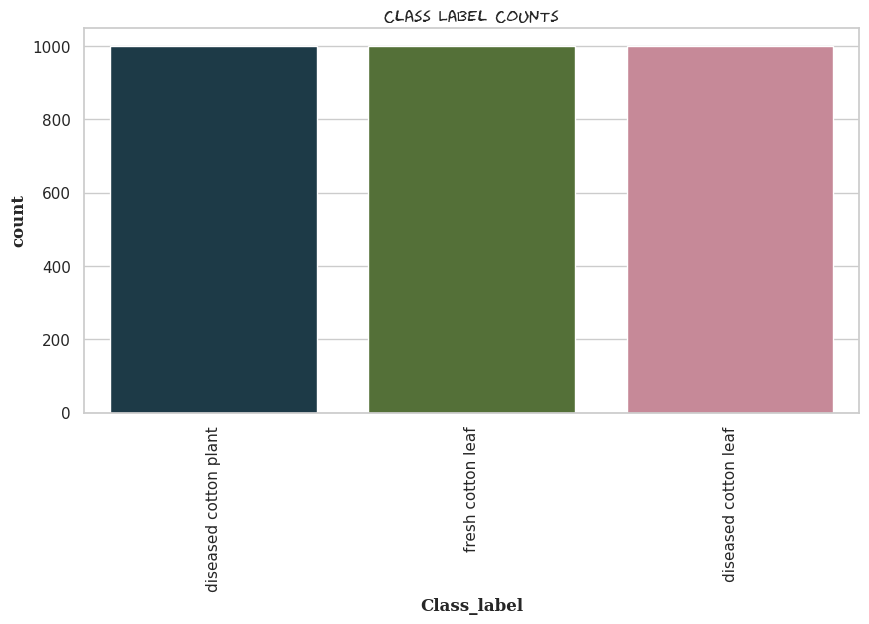

In [22]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

#Resize the images

In [23]:
from PIL import Image
def resize_image(img):
  #file = Image.open(img)
  file = cv2.imread(img)
  #img = file.convert('RGB')
  #img_bgr= img.resize((48, 48))
  resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
  resized= np.array(resized)
  image = np.reshape(resized,[1,224,224,3])
  #img_bgr = np.array(img_bgr)
  return resized

In [24]:

#save resized images to Images
images=[resize_image(img) for img in data['image_path']]

In [25]:
#print num of classes in our data set
num_classes=len(np.unique(data['class_label']))
num_classes

3

In [26]:
data['class_label'][:5]

377         fresh cotton leaf
595         fresh cotton leaf
1530    diseased cotton plant
1310    diseased cotton plant
127      diseased cotton leaf
Name: class_label, dtype: object

In [27]:
#save the class into class names
class_names=list(data['class_label'])

In [28]:
#print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'diseased cotton plant')

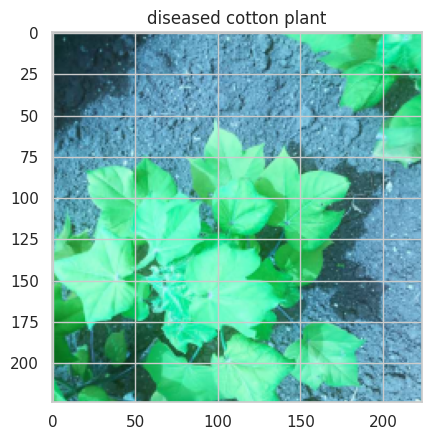

In [29]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'diseased cotton leaf')

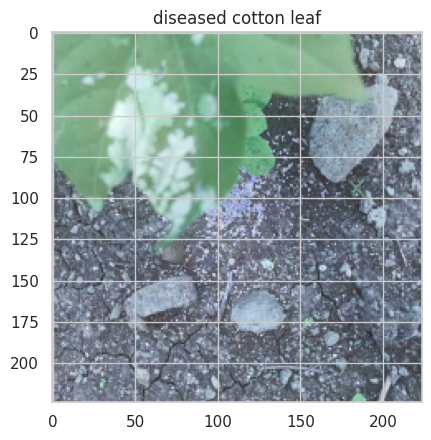

In [30]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

Text(0.5, 1.0, 'diseased cotton plant')

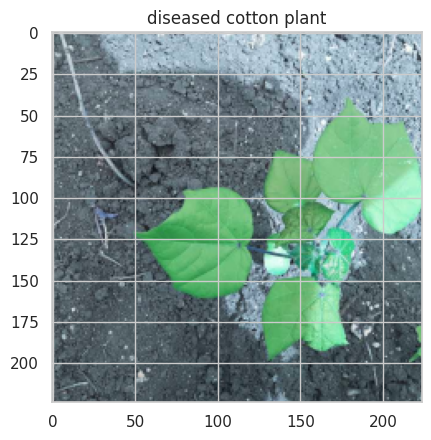

In [31]:
#See the image with class label
plt.imshow(images[32])
plt.title(class_names[32])

In [32]:
images=np.array(images)

In [33]:
images.shape

(3000, 224, 224, 3)

#Encoding

In [34]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [35]:
enc.classes_

array(['diseased cotton leaf', 'diseased cotton plant',
       'fresh cotton leaf'], dtype='<U21')

In [36]:
data['class_label'][:10]

377         fresh cotton leaf
595         fresh cotton leaf
1530    diseased cotton plant
1310    diseased cotton plant
127      diseased cotton leaf
544     diseased cotton plant
994         fresh cotton leaf
180     diseased cotton plant
525     diseased cotton plant
60       diseased cotton leaf
Name: class_label, dtype: object

In [37]:
y[:10]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [38]:
y[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [39]:
y=np.array(y)

In [40]:
y[:6]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [41]:
y.shape

(3000, 3)

In [42]:
images.shape

(3000, 224, 224, 3)

In [43]:
y.shape

(3000, 3)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [45]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [46]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/20
17/17 [==============================] - 12s 732ms/step - loss: 1.0345 - accuracy: 0.4810 - val_loss: 1.0201 - val_accuracy: 0.4422
Epoch 2/20
17/17 [==============================] - 12s 716ms/step - loss: 1.0202 - accuracy: 0.4600 - val_loss: 1.0117 - val_accuracy: 0.5489
Epoch 3/20
17/17 [==============================] - 12s 716ms/step - loss: 0.9845 - accuracy: 0.4981 - val_loss: 1.0015 - val_accuracy: 0.4778
Epoch 4/20
17/17 [==============================] - 12s 717ms/step - loss: 0.9774 - accuracy: 0.5295 - val_loss: 0.9528 - val_accuracy: 0.5178
Epoch 5/20
17/17 [==============================] - 12s 695ms/step - loss: 0.9808 - accuracy: 0.5181 - val_loss: 0.8948 - val_accuracy: 0.5700
Epoch 6/20
17/17 [==============================] - 12s 721ms/step - loss: 1.1548 - accuracy: 0.4910 - val_loss: 0.9461 - val_accuracy: 0.5956
Epoch 7/20
17/17 [==============================] - 12s 695ms/step - loss: 0.9325 - accuracy: 0.5452 - val_loss: 0.9244 - val_accuracy: 0.6156

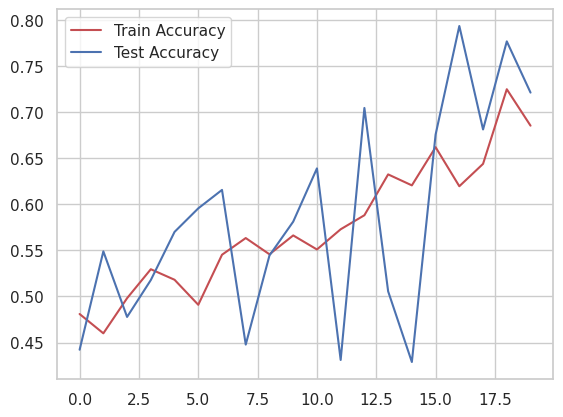

In [51]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

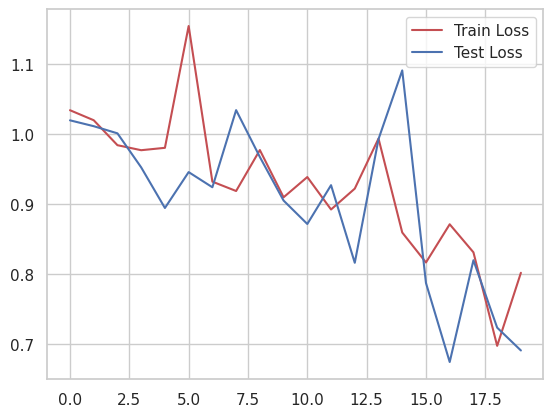

In [52]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [53]:
#print the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7211111187934875


29/29 [==============================] - 1s 33ms/step


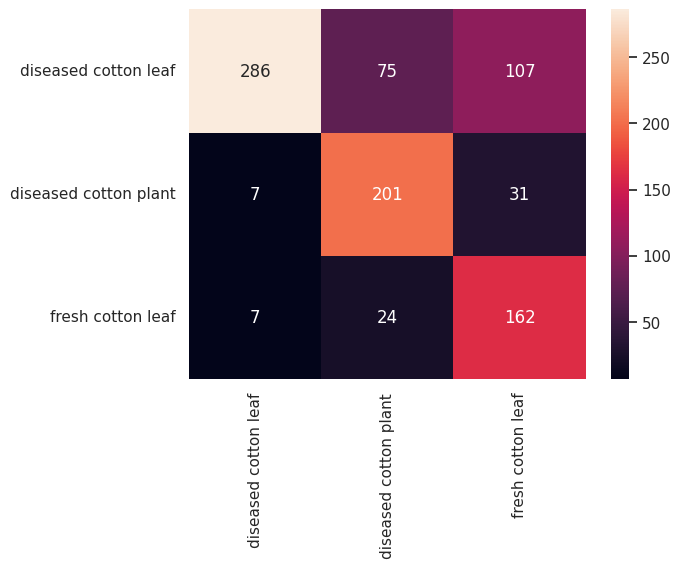

In [54]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

1/1 [==============================] - 0s 29ms/step
Predicted class: diseased cotton plant
Actual class: diseased cotton plant


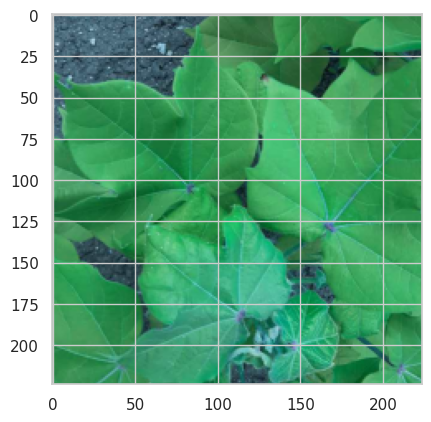

In [56]:
i = 45
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

In [57]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [58]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [59]:
vgg.trainable=False

In [60]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(3, activation='softmax'))

In [61]:
#Compile the model
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_1.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/Alzheimers_weights-improvement_vgg16-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [63]:
#Fit the data or train the models
History_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 64)

Epoch 1/10
33/33 [==============================] - 27s 599ms/step - loss: 13.3573 - accuracy: 0.8105 - val_loss: 0.3914 - val_accuracy: 0.9633
Epoch 2/10
33/33 [==============================] - 13s 388ms/step - loss: 0.4052 - accuracy: 0.9557 - val_loss: 0.3869 - val_accuracy: 0.9100
Epoch 3/10
33/33 [==============================] - 13s 389ms/step - loss: 0.3259 - accuracy: 0.9443 - val_loss: 0.3044 - val_accuracy: 0.9333
Epoch 4/10
33/33 [==============================] - 13s 393ms/step - loss: 0.2957 - accuracy: 0.9486 - val_loss: 0.2013 - val_accuracy: 0.9867
Epoch 5/10
33/33 [==============================] - 11s 346ms/step - loss: 0.2692 - accuracy: 0.9462 - val_loss: 0.1720 - val_accuracy: 0.9811
Epoch 6/10
33/33 [==============================] - 11s 343ms/step - loss: 0.2432 - accuracy: 0.9552 - val_loss: 0.1613 - val_accuracy: 0.9878
Epoch 7/10
33/33 [==============================] - 13s 400ms/step - loss: 0.2263 - accuracy: 0.9643 - val_loss: 0.1502 - val_accuracy: 0.991

29/29 [==============================] - 8s 112ms/step


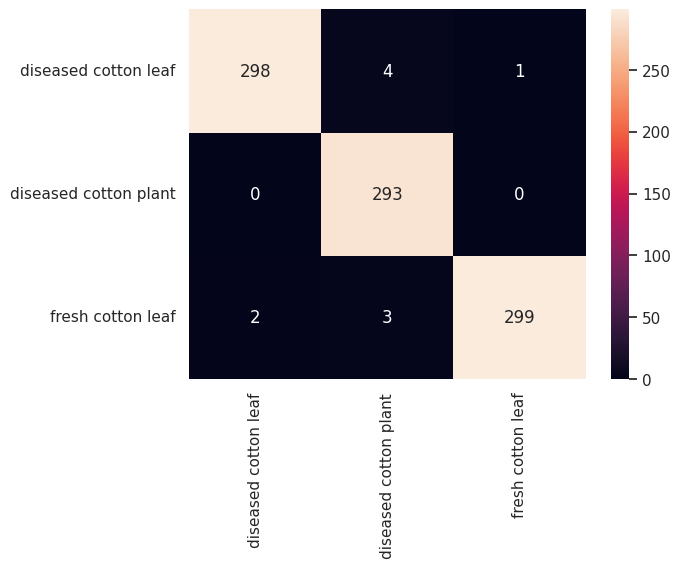

In [65]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

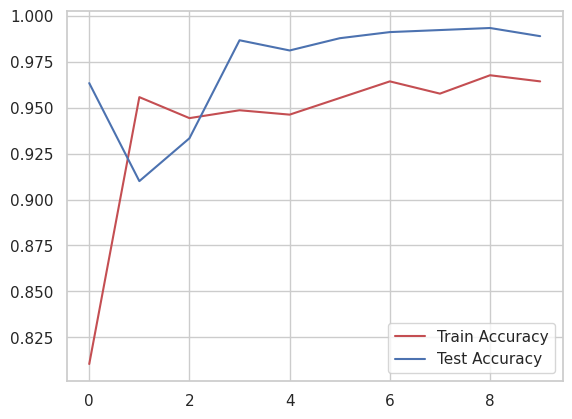

In [66]:
#Plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

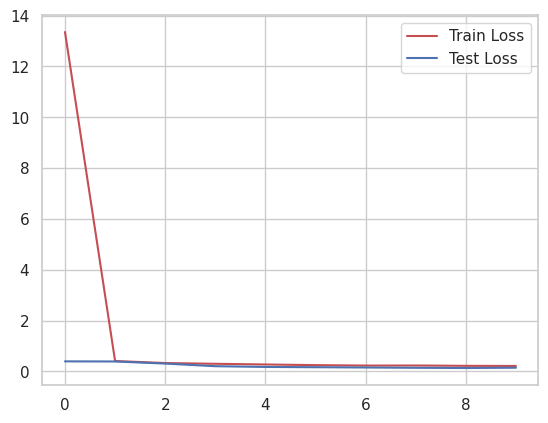

In [67]:
#Plot the loss plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [68]:
#print the test accuracy
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.9888888597488403


1/1 [==============================] - 1s 1s/step
Predicted class: fresh cotton leaf
Actual class: fresh cotton leaf


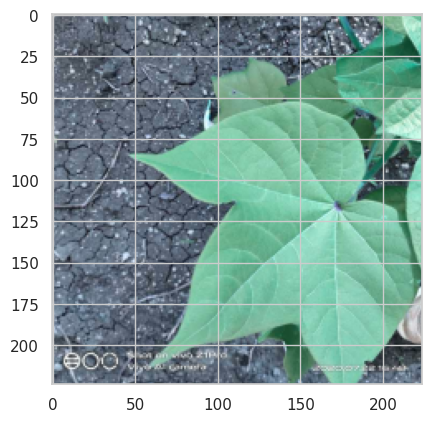

In [69]:
i = 3
pred = np.argmax(model_1.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])